In [1]:
from specim_test.specim.specfuncs import spec2d
from astropy.io import fits as pf
import numpy as np
import matplotlib.pyplot as plt
from specim.specfuncs import spec1d
import glob
from keckcode.deimos import deimosmask1d

In [2]:
infile = 'J0248_r0037_clean.fits'

In [3]:
spec = spec2d.Spec2d(infile, hext=1)      #, hext=12, xtrim=[30, 500])


Loading file J0248_r0037_clean.fits
-----------------------------------------------
Read in 2-dimensional spectrum from J0248_r0037_clean.fits (HDU=1)
Final data dimensions (x y): 191 x 4096

Dispersion axis:              x
N_pixels along dispersion axis: 191



In [4]:
spec.set_dispaxis('y')


Old value of dispaxis: x

Dispersion axis:              y
N_pixels along dispersion axis: 4096




Dispersion : 0.800000
Found 240 NaNs in the two-dimensional spectrum

sky subtracted and cosmic ray rejected data has been resampled in place of the coordinateds whcih rectify the tilted wave image


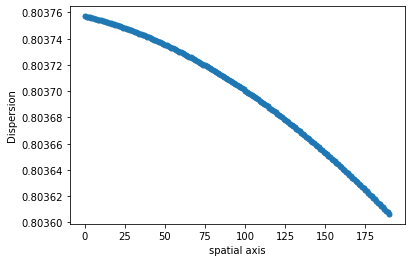

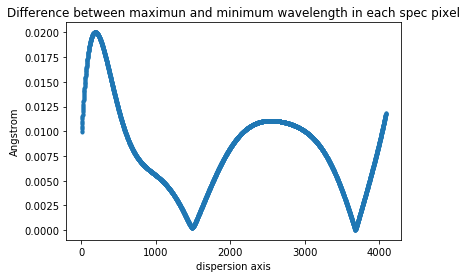

In [5]:
spec.do_waverect(doplot=True)

Profile max value (before normalization) 333.573181


<IPython.core.display.Javascript object>


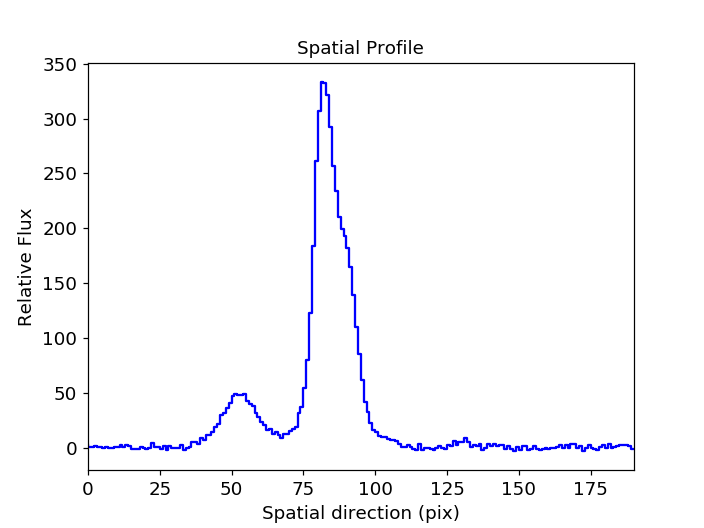

In [6]:
%matplotlib notebook
profile = spec.spatial_profile(pixrange=[1100, 1200])


To create an initial model you first need to enter degree of background polynomial(<3) and number of Gaussian and Moffat profile as integers.
Order of background polynomial : 0
Number of Gaussian profile : 5
Number of Moffat profile : 1

Now enter constants of the background polynomial upto degree 0
c0 : 1

Enter parameter values for a Gaussian profile in following format...
amplitude_value, mu_value, sigma_value

Parameters of Gaussian profile 1 : 52, 53, 2.5

amplitude=52.000000, mu=53.000000, sigma=2.500000

Parameters of Gaussian profile 2 : 190, 78, 2

amplitude=190.000000, mu=78.000000, sigma=2.000000

Parameters of Gaussian profile 3 : 50, 84, 1

amplitude=50.000000, mu=84.000000, sigma=1.000000

Parameters of Gaussian profile 4 : 190, 90, 2

amplitude=190.000000, mu=90.000000, sigma=2.000000

Parameters of Gaussian profile 5 : 5, 130, 2

amplitude=5.000000, mu=130.000000, sigma=2.000000

Enter parameter values for a Moffat profile in following format...
amplitude_value, x_0_va

<IPython.core.display.Javascript object>


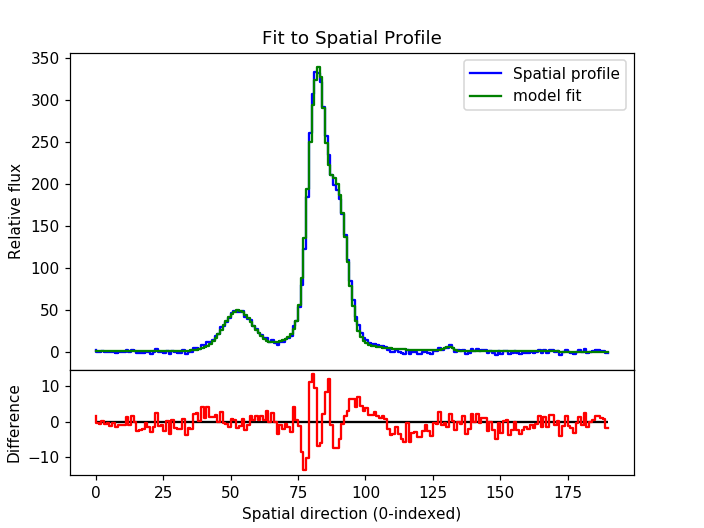

<IPython.core.display.Javascript object>


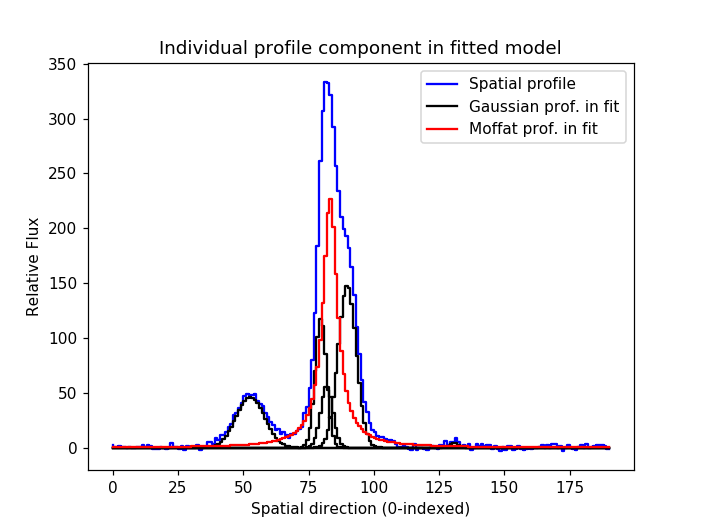


Do you want to start over ? : type yes/no
no


In [37]:
mod1 = spec.initial_model()

In [ ]:
Gaussian1D(amplitude=59.96396363, mean=55.52475591, stddev=6.26798005)>

    [2]: <Gaussian1D(amplitude=5.93879004, mean=132.08771073, stddev=2.69444346)>

    [3]: <Moffat1D(amplitude=212.91639921, x_0=84.36990645, gamma=5.97365307, alpha=2.30620693)>

    [4]: <Moffat1D(amplitude=95.62956046, x_0=91.84835864, gamma=7.37704988, alpha=2.07771975)>

In [47]:
def tie_pos1_gauss(model):
    return model.mean_3 - 33.748

def tie_pos1_moffat(model):
     return model.x_0_6 -  31.117
            
def tie_pos2_gauss(model):
     return model.mean_3 - 3.78
    
def tie_pos2_moffat(model):
    return model.x_0_6 - 3.29

def tie_pos3_moffat(model):
    return model.x_0_6 -  1.0

def tie_pos3_gauss(model):
     return model.mean_3 + 4.4
    
def tie_pos4_moffat(model):
    return model.x_0_6  + 7.8

# for two Gaussian and one Moffat  
mod1[1].mean.tied = tie_pos1_moffat 
mod1[2].mean.tied = tie_pos2_moffat 
mod1[3].mean.tied = tie_pos3_moffat

#mod1[5].gamma = 4.0
#mod1[5].gamma.fixed = True

# for two Gaussian profile
#mod1[1].mean.tied = tie_pos1_gauss 
#mod1[2].mean.tied = tie_pos2_gauss 
#mod1[4].mean.tied = tie_pos3_gauss 

# for two Moffat profile
#mod[1].x_0.tied = tie_pos1_moffat
#mod[3].x_0.tied = tie_pos2_moffat


Initial model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2] + [3] + [4] + [5] + [6]
Components: 
    [0]: <Polynomial1D(0, c0=0.56843555)>

    [1]: <Gaussian1D(amplitude=46.23429243, mean=53.20759443, stddev=5.44257673)>

    [2]: <Gaussian1D(amplitude=118.33304355, mean=80.22961469, stddev=2.1839183)>

    [3]: <Gaussian1D(amplitude=56.7395572, mean=82.49108426, stddev=2.31236517)>

    [4]: <Gaussian1D(amplitude=148.34427156, mean=90.29860655, stddev=3.45721946)>

    [5]: <Gaussian1D(amplitude=4.74100021, mean=131.29143363, stddev=1.69574443)>

    [6]: <Moffat1D(amplitude=227.25020171, x_0=83.81500069, gamma=3.20905961, alpha=0.95349225)>
Parameters:
           c0_0           amplitude_1    ...      gamma_6           alpha_6      
    ------------------ ----------------- ... ----------------- ------------------
    0.5684355543994468 46.23429243027448 ... 3.209059614263002 0.9534922529773253

----------------------

<IPython.core.display.Javascript object>


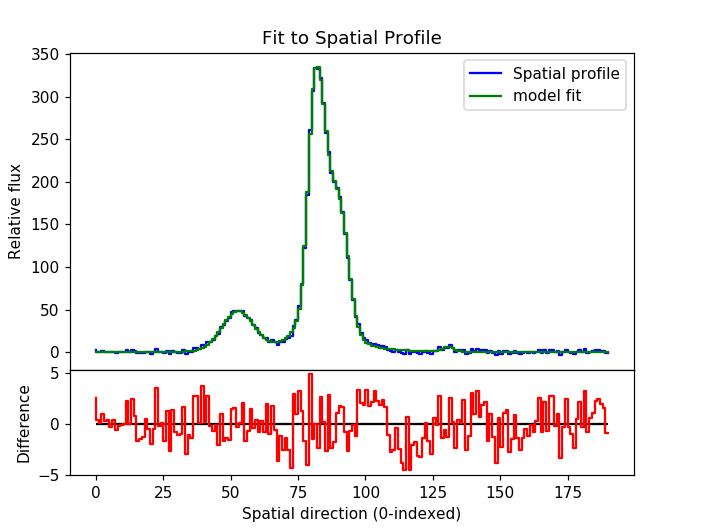

<IPython.core.display.Javascript object>


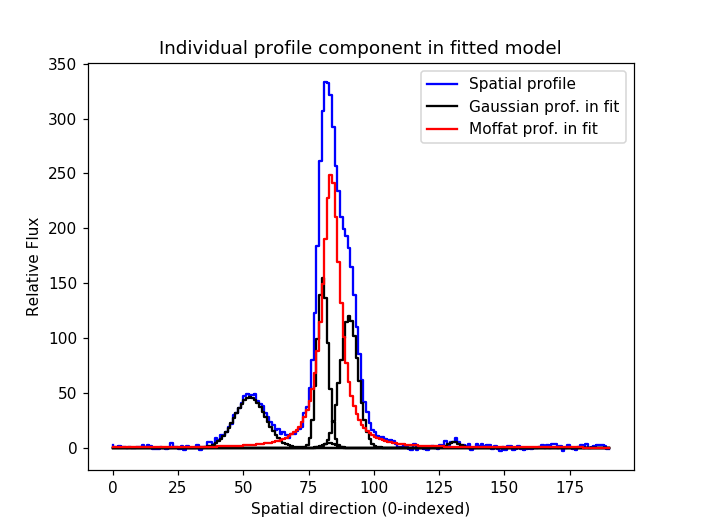

In [48]:
mod_new =spec.refined_model(mod1)


Running fit_trace
---------------------------------------------------------
Fitting to the trace at 163 segments
  of the 2D spectrum with stepsize=25 pix ...
    Done
Fitting polynomial of degree 3 to parameter: c0_0
Fitting polynomial of degree 3 to parameter: mean_1
Fitting polynomial of degree 3 to parameter: stddev_1
Fitting polynomial of degree 3 to parameter: mean_2
Fitting polynomial of degree 3 to parameter: stddev_2
Fitting polynomial of degree 3 to parameter: mean_3
Fitting polynomial of degree 3 to parameter: stddev_3
Fitting polynomial of degree 2 to parameter: mean_4
Fitting polynomial of degree 2 to parameter: stddev_4
Fitting polynomial of degree 3 to parameter: mean_5
Fitting polynomial of degree 3 to parameter: stddev_5
Fitting polynomial of degree 3 to parameter: x_0_6
Fitting polynomial of degree 3 to parameter: gamma_6
Fitting polynomial of degree 3 to parameter: alpha_6


<IPython.core.display.Javascript object>


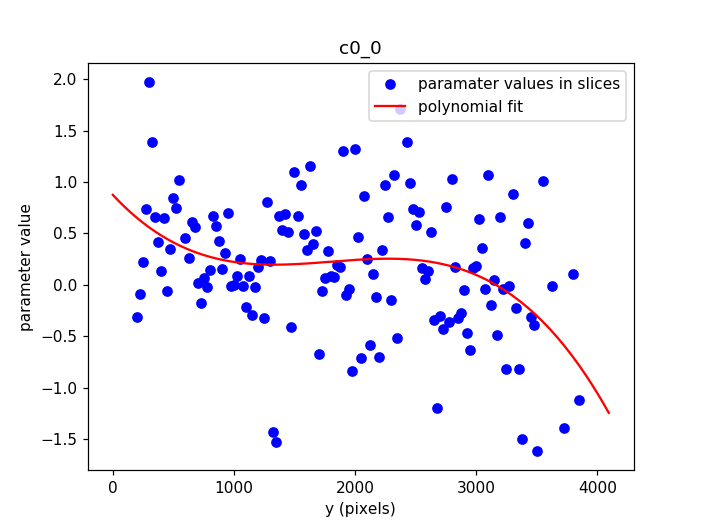

<IPython.core.display.Javascript object>


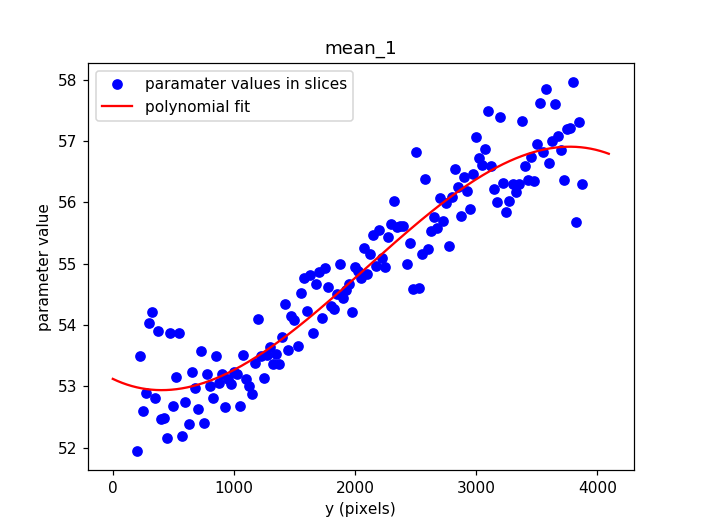

<IPython.core.display.Javascript object>


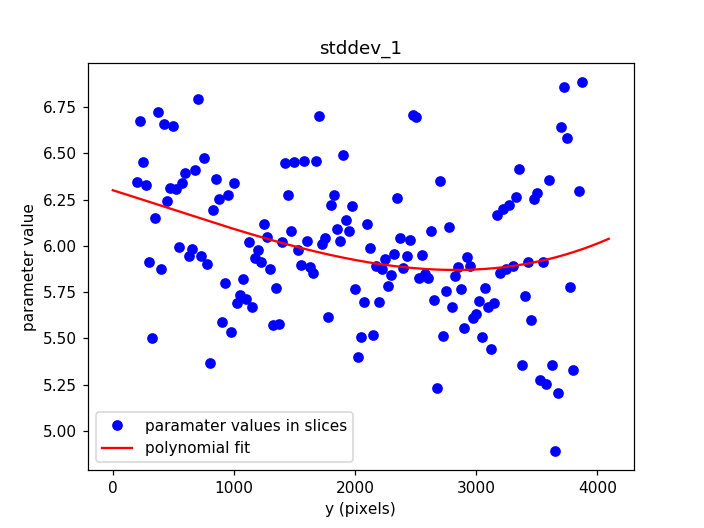

<IPython.core.display.Javascript object>


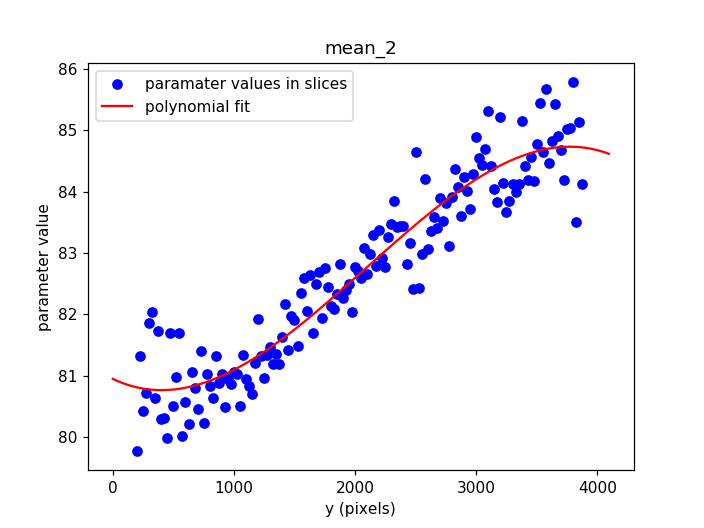

<IPython.core.display.Javascript object>


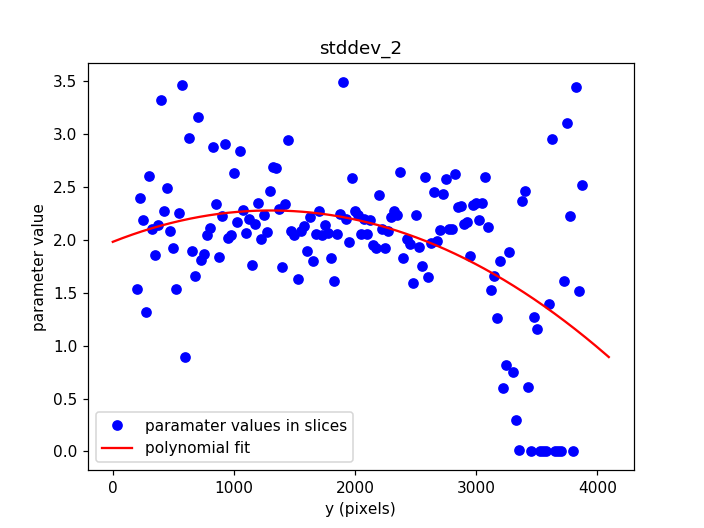

<IPython.core.display.Javascript object>


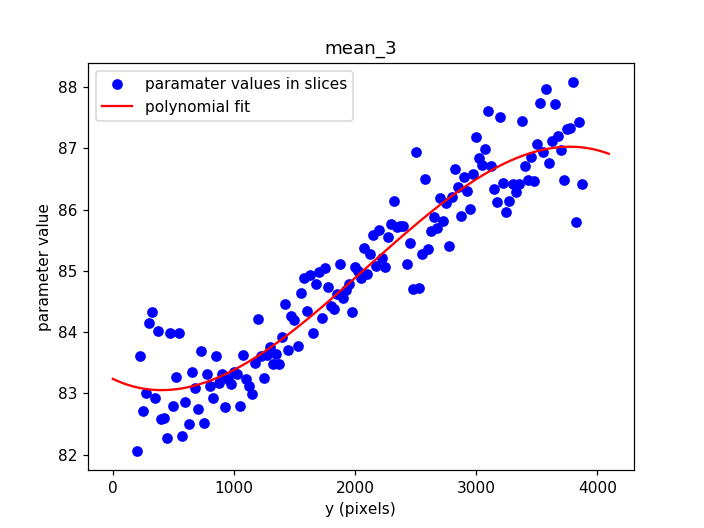

<IPython.core.display.Javascript object>


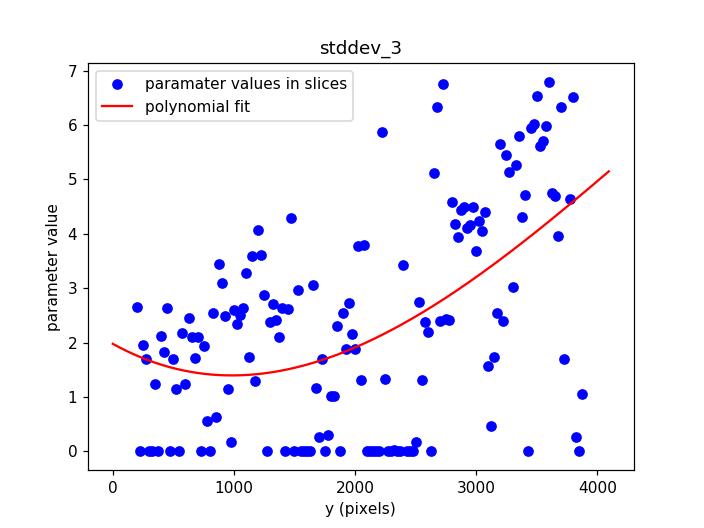

<IPython.core.display.Javascript object>


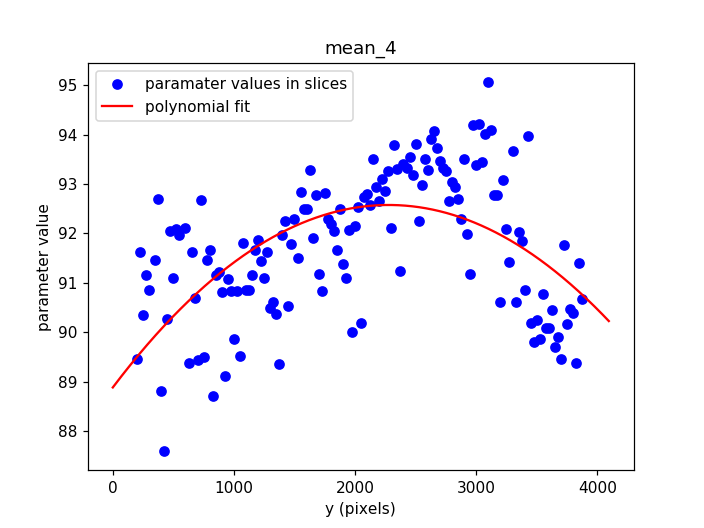

<IPython.core.display.Javascript object>


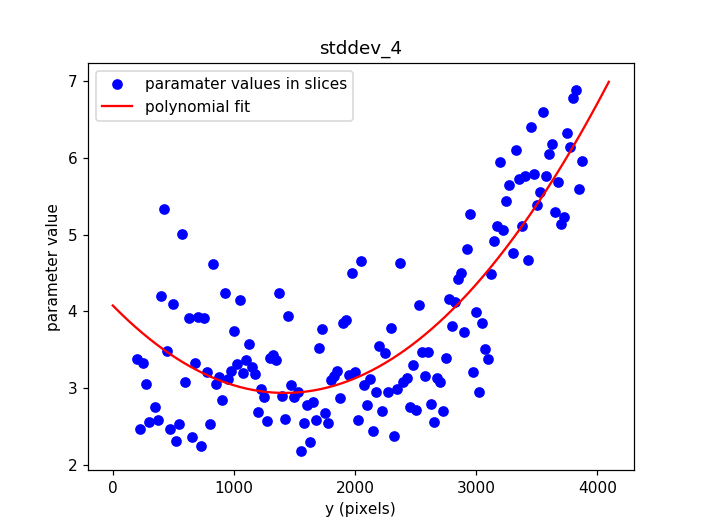

<IPython.core.display.Javascript object>


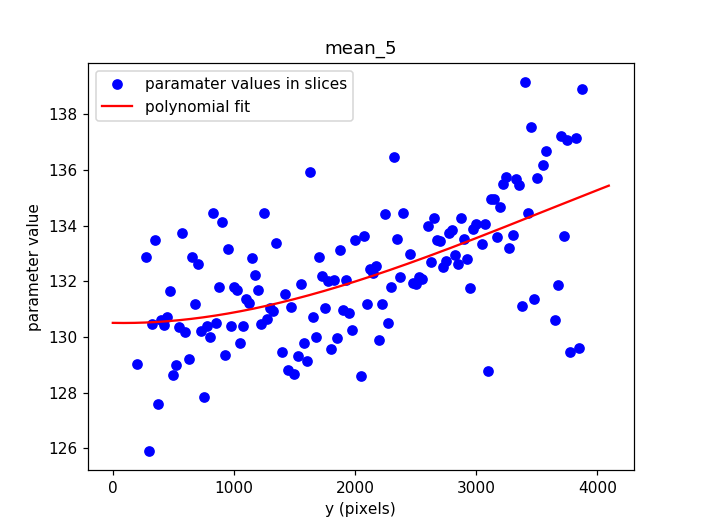

<IPython.core.display.Javascript object>


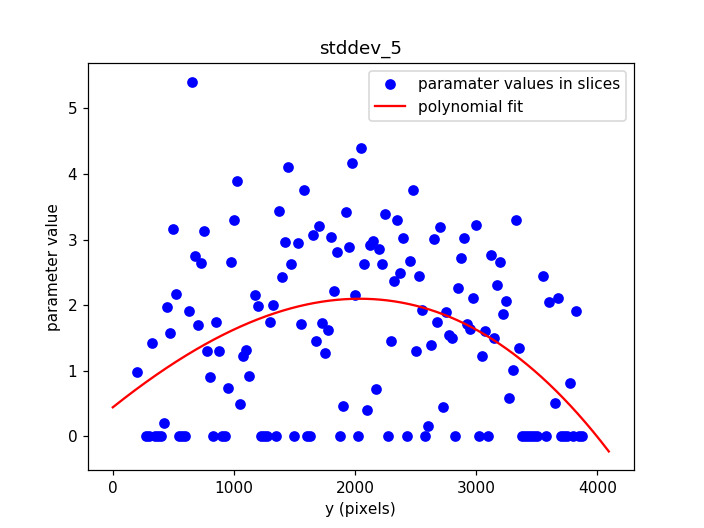

<IPython.core.display.Javascript object>


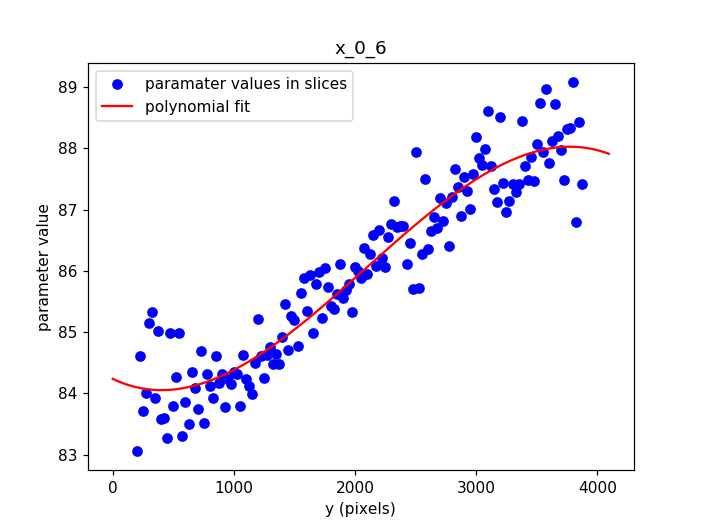

<IPython.core.display.Javascript object>


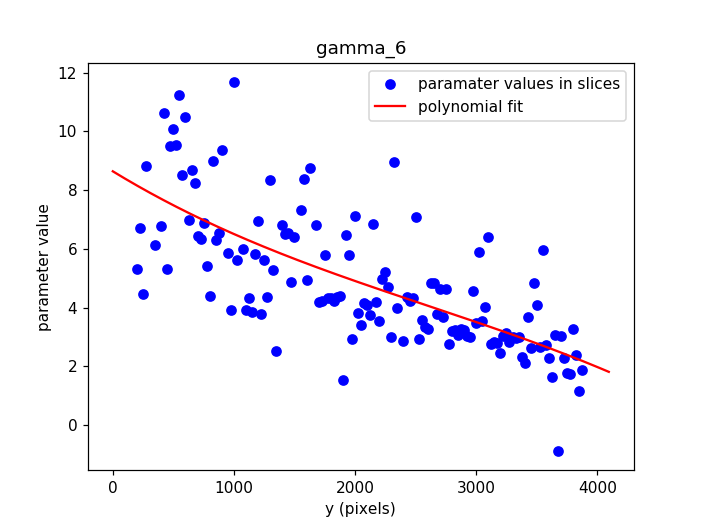

<IPython.core.display.Javascript object>


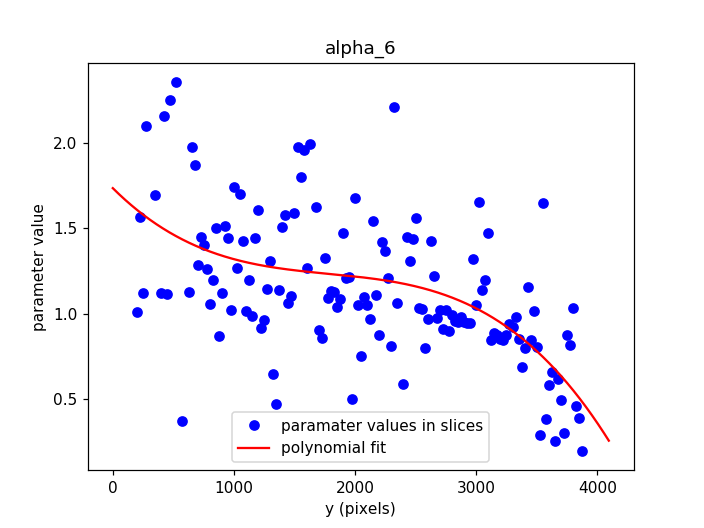

In [49]:
spec.find_and_trace(mod1, stepsize=25, fitorder={'stddev_4':2, 'mean_4':2, 'gamma_2':3, 'alpha_2':3},
                    fitrange=[200,3900])

Fitting to 6 components, plus a background
Extracting the spectrum.  Please be patient
 Extraction range (pixels): 0 - 4096
Fitting to the trace at 4096 segments
  of the 2D spectrum with stepsize=1 pix ...
 Spectrum Start:  5649.80
 Spectrum End:     8925.80
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80

 Spectrum Start:  5649.80
 Spectrum End:     8925.80
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80

 Spectrum Start:  5649.80
 Spectrum End:     8925.80
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80

 Spectrum Start:  5649.80
 Spectrum End:     8925.80
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80

 Spectrum Start:  5649.80
 Spectrum End:     8925.80
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80

 Spectrum Start:  5649.80
 Spectrum End:     8925.80
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80


Plotting the spectrum


<IPython.core.display.Javascript object>


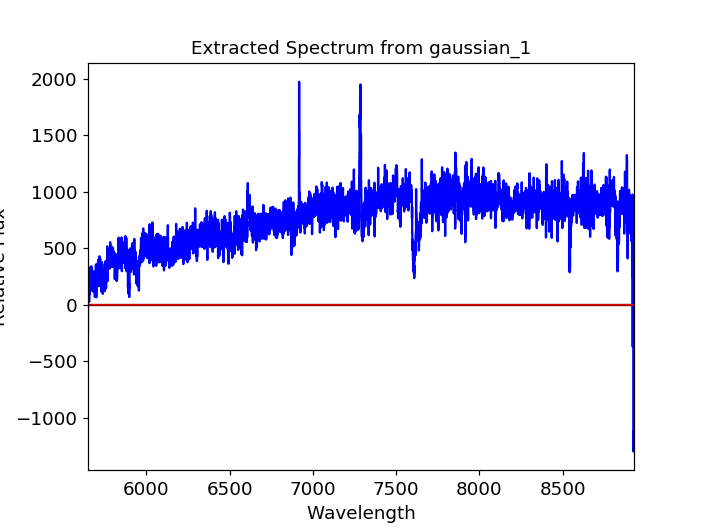

<IPython.core.display.Javascript object>


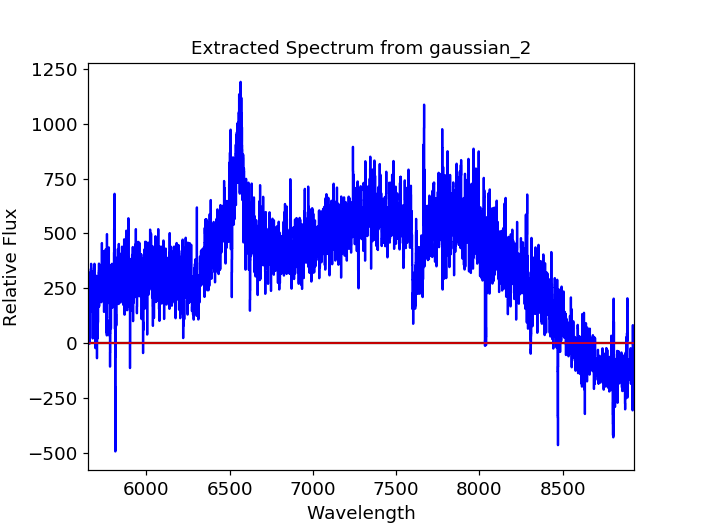

<IPython.core.display.Javascript object>


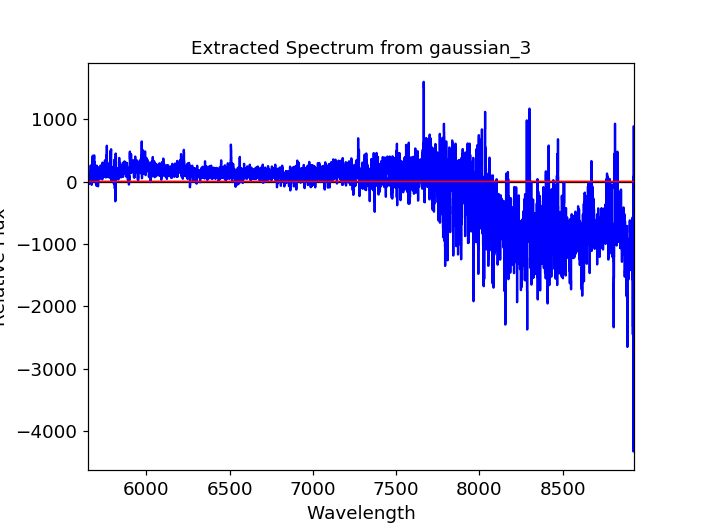

<IPython.core.display.Javascript object>


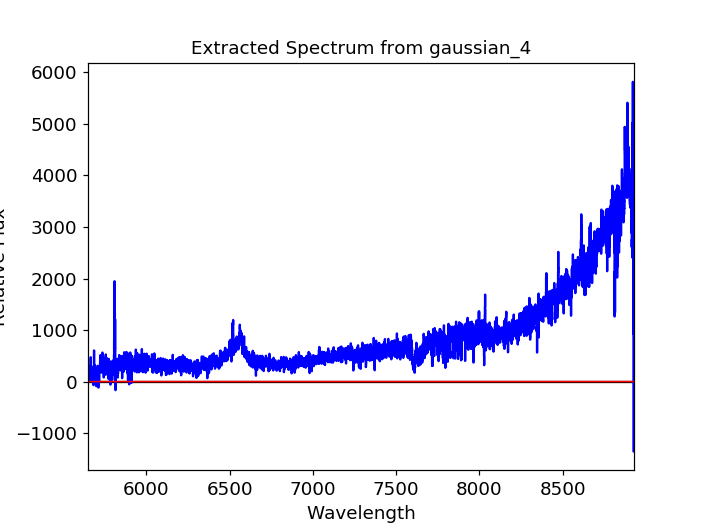

<IPython.core.display.Javascript object>


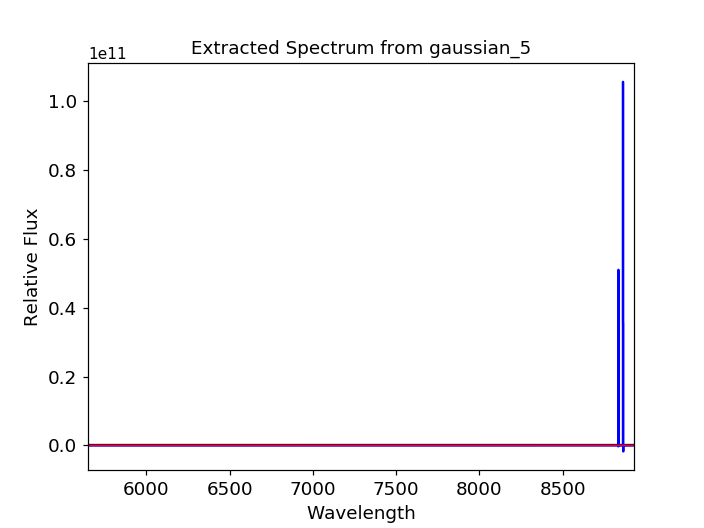

<IPython.core.display.Javascript object>


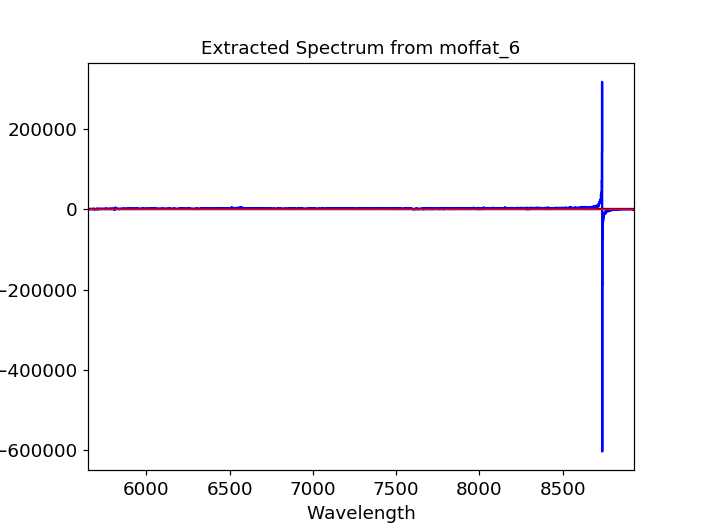

In [50]:
spec.extract(method='modelfit')

In [61]:
wav = spec.spectra[5][1]['wav']
flux = spec.spectra[5][1]['flux']

In [64]:
flux1 = spec.spectra[1][1]['flux']

In [65]:
spec1 = spec1d.Spec1d(wav=wav[0:3800], flux=flux[0:3800]-flux1[0:3800])

 Spectrum Start:  5649.80
 Spectrum End:     8689.00
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80



<IPython.core.display.Javascript object>


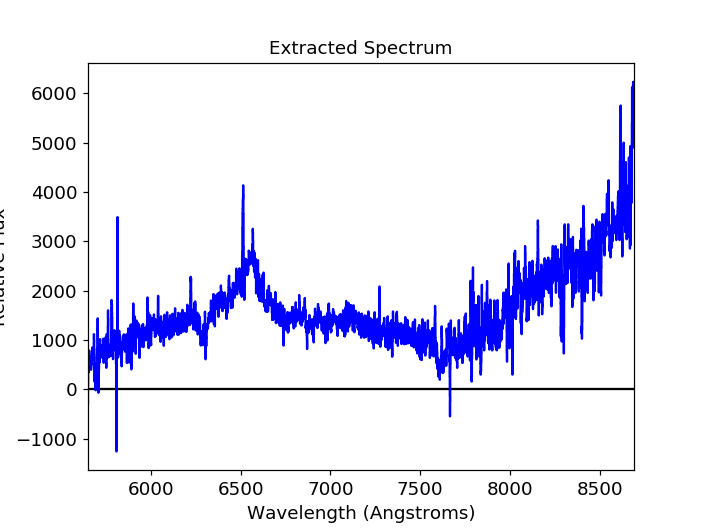

In [66]:
spec1.smooth(3)

In [ ]:
wav = spec.spectra[2][1]['wav']
flux = spec.spectra[2][1]['flux']

In [ ]:
spec1 = spec1d.Spec1d(wav=wav[0:4000], flux=flux[0:4000])

<IPython.core.display.Javascript object>


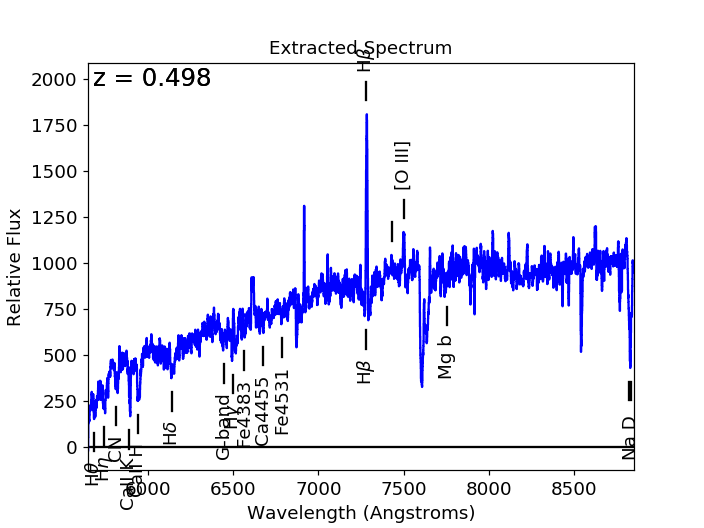


Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-theta       3797.00       5687.91
H-eta         3835.00       5744.83
CN bandhd     3883.00       5816.73
CaII K        3933.67       5892.64
CaII H        3968.47       5944.77
H-delta       4101.00       6143.30
G-band        4305.00       6448.89
H-gamma       4340.00       6501.32
Fe4383        4383.00       6565.73
Ca4455        4455.00       6673.59
Fe4531        4531.00       6787.44
H-beta        4861.00       7281.78
Mg I (b)      5176.00       7753.65
Na I (D)      5889.95       8823.15
Na I (D)      5895.92       8832.09


Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-beta        4861.00       7281.78
[O III]       4962.00       7433.08
[O III]       5007.00       7500.49



In [33]:
spec1.smooth(5)
spec1.mark_lines('abs', z=0.498, usesmooth=True)
spec1.mark_lines('strongem', z=0.498, usesmooth=True)

In [ ]:
wav = spec.spectra[0][1]['wav']
flux = spec.spectra[0][1]['flux']

In [ ]:
spec1 = spec1d.Spec1d(wav=wav[0:4080], flux=flux[0:4080])

In [ ]:
spec1.smooth(9)
spec1.mark_lines('abs', z=0.498, usesmooth=True)
spec1.mark_lines('strongem', z=0.498, usesmooth=True)